## Sharan S
### Assignment-6, Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [2]:
bank=pd.read_csv("bank-full.csv",sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Text(0.5, 1.05, 'Pearson correlation of Features')

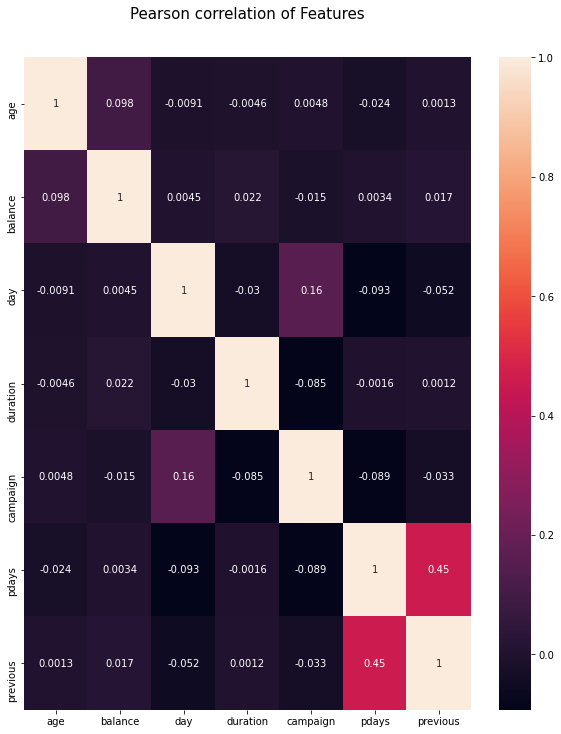

In [5]:
import seaborn as sns
corr = bank.corr()

f, ax = plt.subplots(figsize=(10,12))

sns.heatmap(corr, ax=ax, annot=True)

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [6]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [7]:
# Dropping marital and contact details
bank.drop(['marital'],axis=1,inplace=True)
bank.drop(['contact'],axis=1,inplace=True)
bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no


Changing categorical variable to numerical variable

In [8]:
bank[['default','housing','loan']]=bank[['default','housing','loan']].replace(["yes","no"],['1','0'])
bank['month']=bank['month'].replace(["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
bank['job']=bank['job'].replace(['unknown'],['other'])
bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,no
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,no
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,no


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank['job']=le.fit_transform(bank['job'])
bank['education']=le.fit_transform(bank['education'])
bank['poutcome']=le.fit_transform(bank['poutcome'])
bank.head()


,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,no
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,no
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,no
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,no
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,no


### Ouliers

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import warnings
warnings.filterwarnings('ignore')

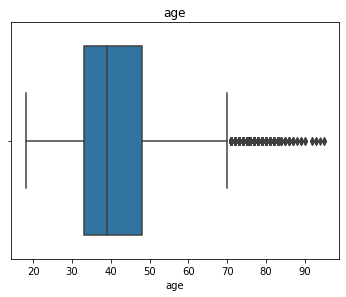

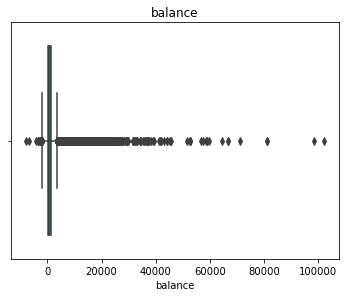

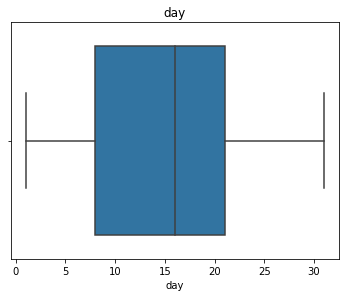

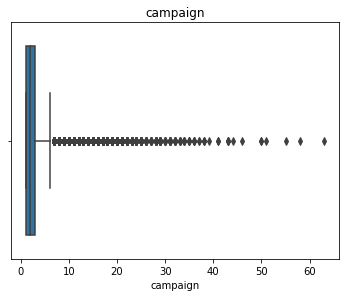

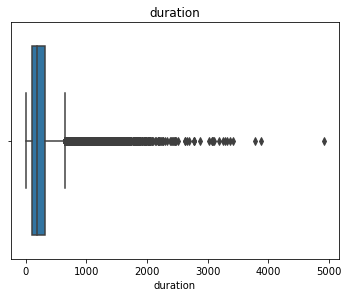

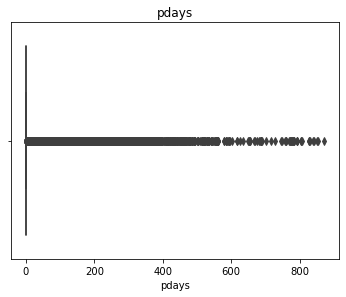

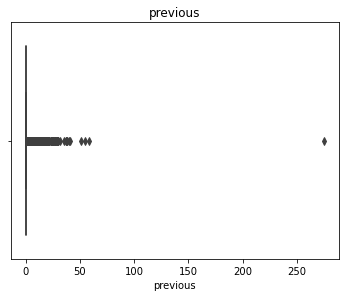

In [12]:
import seaborn as sns
col=bank[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
    n=1
    plt.figure(figsize=(20,20))
    plt.subplot(4,3,1)
    sns.boxplot(bank[i])
    plt.title(i)
    plt.show()
    n=n+1
    

Removing Outliers

In [13]:
from scipy import stats
z=np.abs(stats.zscore(bank[['age','balance','duration','campaign','pdays','previous']]))
print(z)
bank=bank[(z<3).all(axis=1)]
bank.shape

[[1.60696496 0.25641925 0.0110161  0.56935064 0.41145311 0.25194037]
 [0.28852927 0.43789469 0.41612696 0.56935064 0.41145311 0.25194037]
 [0.74738448 0.44676247 0.70736086 0.56935064 0.41145311 0.25194037]
 ...
 [2.92540065 1.42959305 3.37379688 0.72181052 1.43618859 1.05047333]
 [1.51279098 0.22802402 0.97014641 0.39902023 0.41145311 0.25194037]
 [0.37068857 0.52836436 0.39932797 0.24656035 1.4761376  4.52357654]]


(40209, 15)

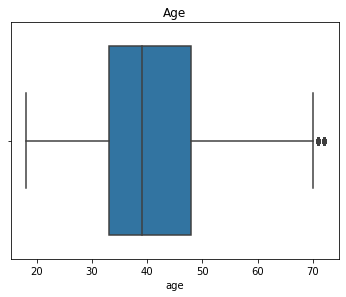

In [14]:
# Checking for outliers
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.boxplot(bank['age'])
plt.title("Age")
plt.show()

In [15]:
bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,no
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,no
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,no
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,no
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,no


In [16]:
x=bank.drop(['y'],axis=1)
y=bank['y']

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
model=LogisticRegression()
model.fit(x,y)
pred=model.predict(x)

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
model.coef_

array([[-3.77207157e-02,  4.85078800e-02,  1.60538669e-02,
        -8.27959685e-03,  9.05964943e-05, -4.00005052e-01,
        -1.05971785e-01, -2.73929022e-02, -1.88269401e-02,
         4.73819140e-03, -3.74884699e-01, -2.15452024e-03,
         2.92037181e-01, -3.44587130e-01]])

In [21]:
model.score(x,y)

0.8988286204581064

In [22]:
y_pred=model.predict(x)

In [23]:
y_pred_df=pd.DataFrame({'actual':y,'predicted_prob':model.predict(x)})
y_pred_df.head()

,actual,predicted_prob
0,no,no
1,no,no
2,no,no
3,no,no
4,no,no


[[35423   732]
 [ 3336   718]]


<AxesSubplot:>

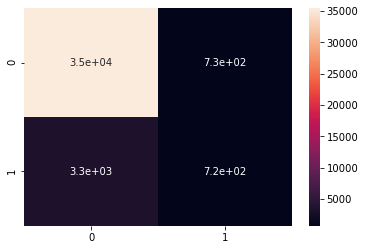

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.95     36155
         yes       0.50      0.18      0.26      4054

    accuracy                           0.90     40209
   macro avg       0.70      0.58      0.60     40209
weighted avg       0.87      0.90      0.88     40209



In [27]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [31]:
classifier.predict_proba(x)

array([[0.93708769, 0.06291231],
       [0.93154536, 0.06845464],
       [0.95467841, 0.04532159],
       ...,
       [0.41684092, 0.58315908],
       [0.93441735, 0.06558265],
       [0.95047639, 0.04952361]])

In [51]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_pred=classifier.predict(x)
y_pred=labelencoder.fit_transform(y_pred)
y=labelencoder.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 0])

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
auc=roc_auc_score(y,y_pred)
print(auc)

0.5784314328819272


Text(0, 0.5, 'True Positive Rate')

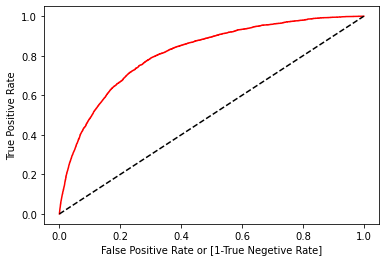

In [53]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-True Negetive Rate]')
plt.ylabel('True Positive Rate')